# Unsupervised ML algorithms

I applied the below mentioned clustering algorithms to the given dataset.
After applying each algorithm I plotted the clustering graphs.

1. KMeans: Elbow method graph and clustering graph
2. Hierarchical Clustering: Dendogram and the clustering graph
3. DBSCN: Clustering graph

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("StudentsPerformance.csv")
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
objects = ["gender","race/ethnicity", "parental level of education", "lunch", "test preparation course"]
label_encoded = LabelEncoder()

for i in objects:
    dataset[i] = label_encoded.fit_transform(list(dataset[i]))

In [6]:
dataset.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

In [7]:
dataset.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [8]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x = dataset.iloc[:,-3:]

In [11]:
x

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [12]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [13]:
x_sc

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

## KMeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(x_sc)
    wcss.append(km.inertia_)

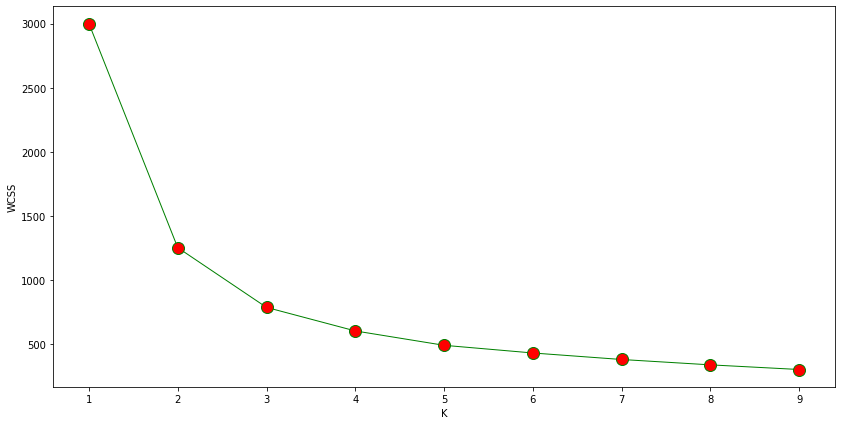

In [16]:
#Finding value of K using elbow method

plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(range(1,10), wcss, color='green', marker='o', linewidth=1, markersize=12, markerfacecolor="r")
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.show()

In [18]:
kmeans_model = KMeans(n_clusters = 5, random_state=1)
kmeans_model.fit(x_sc)
y_kmeans = kmeans_model.predict(x_sc)

In [19]:
y_kmeans

array([1, 4, 4, 2, 1, 1, 4, 0, 3, 2, 2, 0, 1, 1, 2, 1, 4, 0, 0, 2, 3, 3,
       2, 1, 1, 1, 2, 3, 3, 3, 1, 3, 3, 0, 4, 1, 1, 2, 4, 2, 2, 3, 2, 3,
       2, 2, 3, 1, 3, 4, 2, 1, 2, 1, 1, 0, 4, 2, 2, 0, 1, 0, 2, 1, 2, 3,
       0, 3, 2, 2, 3, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 2, 2, 3, 0, 1, 4, 1,
       3, 1, 3, 0, 1, 2, 4, 1, 3, 3, 3, 3, 1, 1, 4, 2, 4, 3, 4, 3, 3, 3,
       4, 2, 2, 2, 4, 1, 1, 1, 2, 3, 4, 4, 4, 2, 1, 4, 3, 1, 1, 2, 4, 0,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 2, 2, 1, 0, 4, 3, 1, 4, 3, 3, 3, 2,
       3, 4, 1, 3, 1, 3, 1, 4, 2, 2, 4, 4, 2, 1, 1, 1, 1, 4, 1, 3, 2, 4,
       2, 1, 3, 4, 3, 2, 2, 3, 2, 3, 1, 3, 2, 4, 3, 1, 3, 3, 1, 2, 3, 2,
       2, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 3, 1, 0, 2, 2, 4, 1, 4, 0, 1, 2,
       3, 1, 3, 1, 3, 2, 1, 2, 3, 4, 3, 0, 1, 4, 4, 1, 3, 3, 2, 1, 3, 1,
       2, 2, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 2, 4,
       1, 2, 1, 1, 4, 1, 3, 2, 2, 3, 4, 1, 4, 3, 1, 3, 2, 2, 1, 1, 0, 1,
       4, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 0, 4, 1,

In [20]:
kmeans_model.cluster_centers_

array([[-1.97283834, -2.04374681, -2.04009202],
       [ 0.5076236 ,  0.56469925,  0.54479735],
       [-0.88464153, -0.9865265 , -1.00553886],
       [-0.16044722, -0.17307356, -0.13086377],
       [ 1.31737982,  1.40629506,  1.3898839 ]])

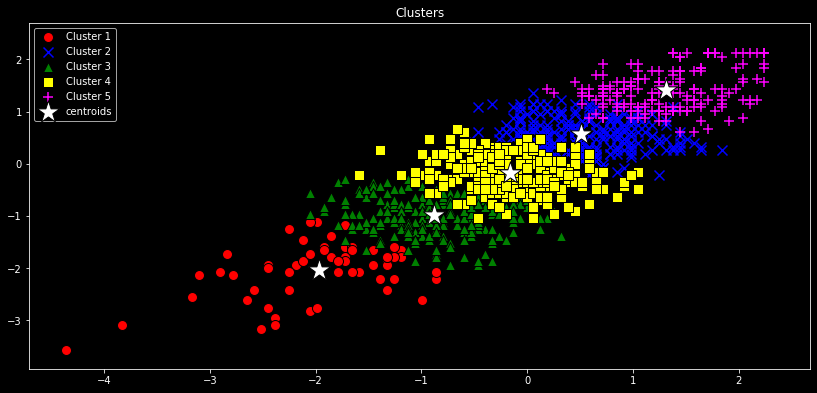

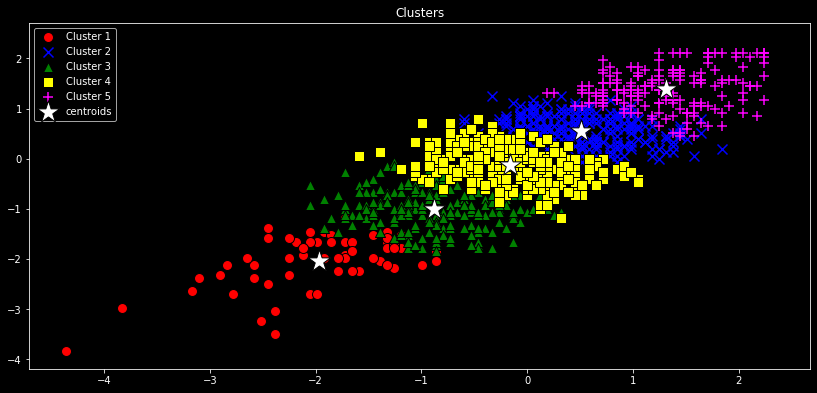

In [21]:
plt.style.use("dark_background")

plt.subplot(2,1,1)
plt.scatter(x_sc[y_kmeans==0, 0], x_sc[y_kmeans==0, 1],marker="o", s=100,c='red', label ='Cluster 1',edgecolor='black')
plt.scatter(x_sc[y_kmeans==1, 0], x_sc[y_kmeans==1, 1],marker="x", s=100, c='blue', label ='Cluster 2',edgecolor='black')
plt.scatter(x_sc[y_kmeans==2, 0], x_sc[y_kmeans==2, 1],marker="^", s=100, c='green', label ='Cluster 3',edgecolor='black')
plt.scatter(x_sc[y_kmeans==3, 0], x_sc[y_kmeans==3, 1],marker="s", s=100, c='yellow', label ='Cluster 4', edgecolor='black')
plt.scatter(x_sc[y_kmeans==4, 0], x_sc[y_kmeans==4, 1],marker="+", s=100, c='magenta', label ='Cluster 5',edgecolor='black')

fig = plt.gcf()
fig.set_size_inches(14,14)

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],s=550, marker='*',
            c='white',edgecolor='black',
            label='centroids')
plt.title('Clusters')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.scatter(x_sc[y_kmeans==0, 0], x_sc[y_kmeans==0, 2],marker="o", s=100,c='red', label ='Cluster 1',edgecolor='black')
plt.scatter(x_sc[y_kmeans==1, 0], x_sc[y_kmeans==1, 2],marker="x", s=100, c='blue', label ='Cluster 2',edgecolor='black')
plt.scatter(x_sc[y_kmeans==2, 0], x_sc[y_kmeans==2, 2],marker="^", s=100, c='green', label ='Cluster 3',edgecolor='black')
plt.scatter(x_sc[y_kmeans==3, 0], x_sc[y_kmeans==3, 2],marker="s", s=100, c='yellow', label ='Cluster 4', edgecolor='black')
plt.scatter(x_sc[y_kmeans==4, 0], x_sc[y_kmeans==4, 2],marker="+", s=100, c='magenta', label ='Cluster 5',edgecolor='black')

fig = plt.gcf()
fig.set_size_inches(14,14)

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 2],s=550, marker='*',
            c='white',edgecolor='black',
            label='centroids')


plt.title('Clusters')
plt.legend()
plt.show()

# Hierarchical Clustering


In [22]:
import scipy.cluster.hierarchy as sch

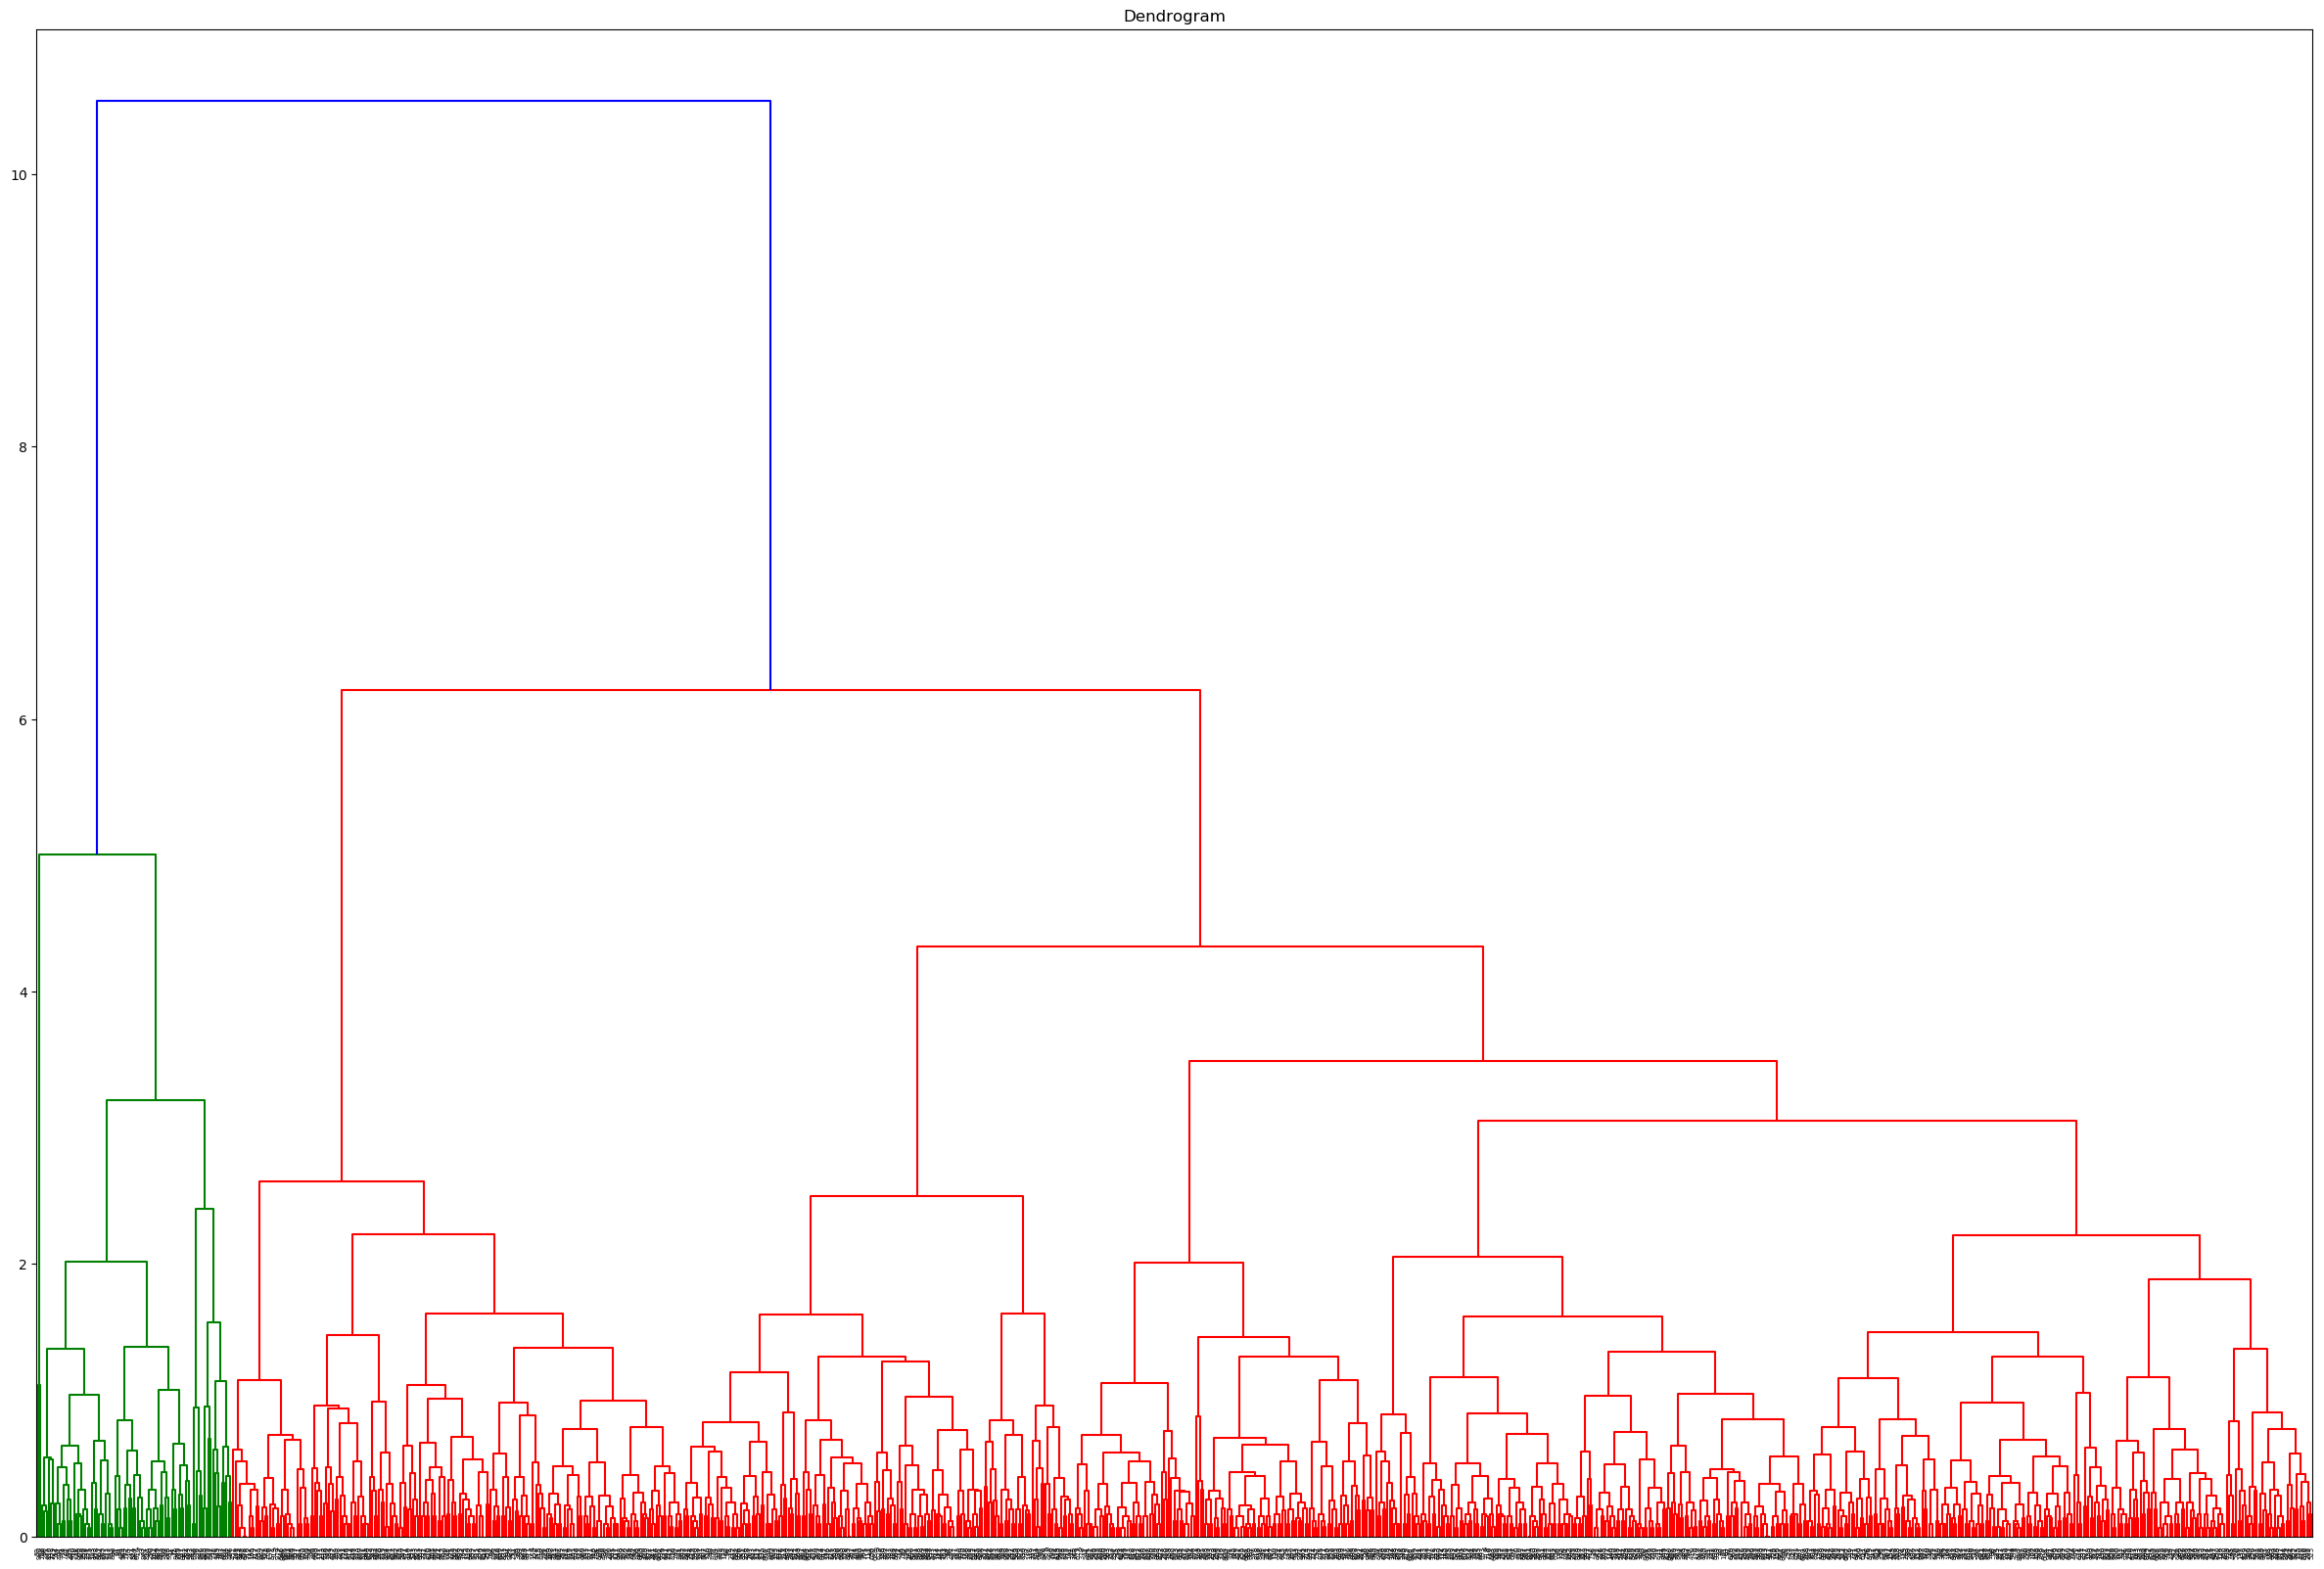

In [23]:
plt.style.use("default")
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(x_sc, method  = "complete"))
plt.title('Dendrogram')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=5,
                                   affinity="euclidean",linkage="complete")

In [25]:
y_hc = hc_model.fit_predict(x_sc)

In [26]:
y_hc

array([0, 2, 2, 4, 0, 0, 2, 1, 0, 4, 4, 1, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 4, 2, 4, 4, 0, 0, 0,
       4, 0, 0, 0, 0, 2, 4, 0, 1, 0, 2, 1, 2, 4, 0, 3, 0, 1, 0, 0, 0, 0,
       1, 0, 4, 4, 0, 0, 1, 4, 1, 1, 1, 0, 0, 0, 1, 1, 4, 0, 1, 0, 2, 0,
       0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 4, 4, 4, 2, 0, 2, 2, 4, 0, 2, 2, 2, 4, 0, 2, 0, 0, 0, 4, 2, 1,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 4,
       0, 2, 0, 0, 0, 0, 0, 2, 4, 4, 2, 2, 4, 0, 0, 0, 0, 2, 2, 0, 4, 2,
       4, 0, 0, 2, 0, 4, 4, 0, 1, 0, 0, 0, 4, 2, 0, 2, 0, 0, 0, 4, 0, 4,
       4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 4, 4, 2, 0, 2, 1, 0, 4,
       0, 2, 0, 0, 0, 4, 0, 4, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 4, 2, 0, 2,
       4, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 4, 0, 2, 0, 2, 0, 0, 0, 4, 1, 0, 0, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,

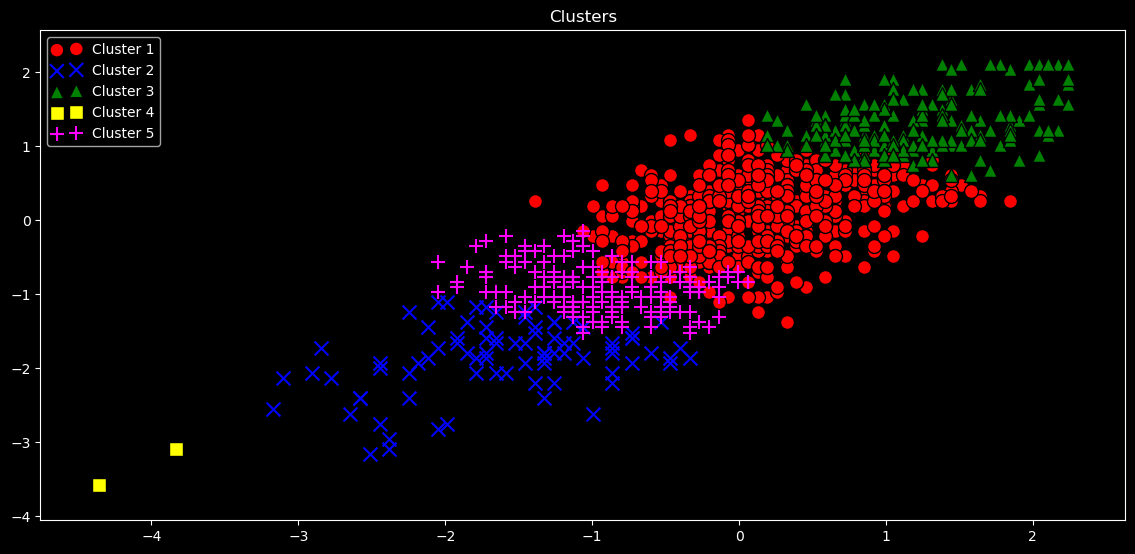

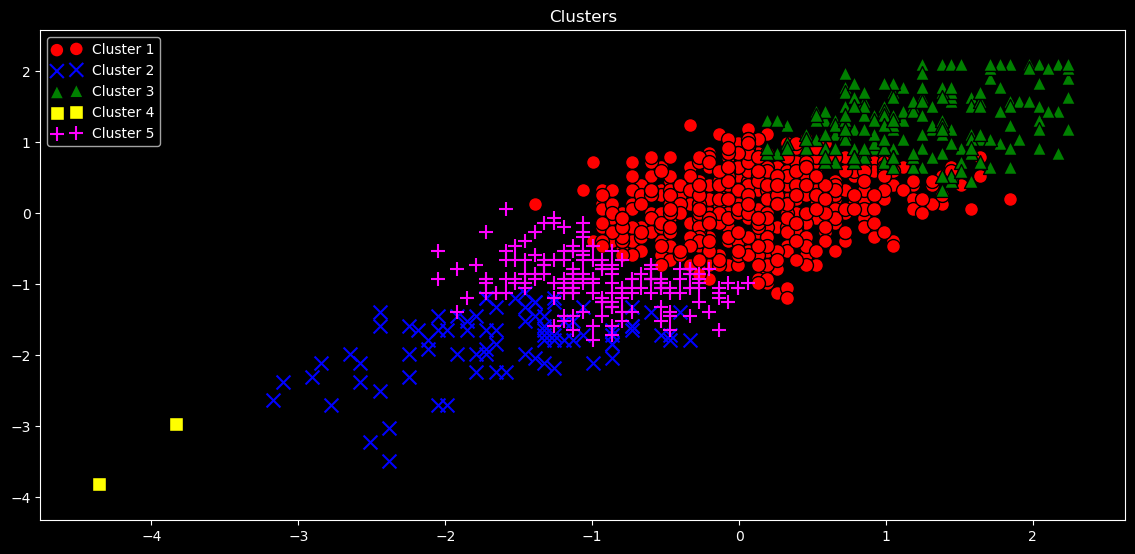

In [27]:
plt.style.use("dark_background")

plt.subplot(2,1,1)
plt.scatter(x_sc[y_hc==0, 0], x_sc[y_hc==0, 1],marker="o", s=100,c='red', label ='Cluster 1',edgecolor='black')
plt.scatter(x_sc[y_hc==1, 0], x_sc[y_hc==1, 1],marker="x", s=100, c='blue', label ='Cluster 2',edgecolor='black')
plt.scatter(x_sc[y_hc==2, 0], x_sc[y_hc==2, 1],marker="^", s=100, c='green', label ='Cluster 3',edgecolor='black')
plt.scatter(x_sc[y_hc==3, 0], x_sc[y_hc==3, 1],marker="s", s=100, c='yellow', label ='Cluster 4', edgecolor='black')
plt.scatter(x_sc[y_hc==4, 0], x_sc[y_hc==4, 1],marker="+", s=100, c='magenta', label ='Cluster 5',edgecolor='black')

fig = plt.gcf()
fig.set_size_inches(14,14)

plt.title('Clusters')
plt.legend(scatterpoints = 2)
plt.show()

plt.subplot(2,1,2)
plt.scatter(x_sc[y_hc==0, 0], x_sc[y_hc==0, 2],marker="o", s=100, c='red', label ='Cluster 1', edgecolor='black')
plt.scatter(x_sc[y_hc==1, 0], x_sc[y_hc==1, 2],marker="x", s=100, c='blue', label ='Cluster 2', edgecolor='black')
plt.scatter(x_sc[y_hc==2, 0], x_sc[y_hc==2, 2],marker="^", s=100, c='green', label ='Cluster 3', edgecolor='black')
plt.scatter(x_sc[y_hc==3, 0], x_sc[y_hc==3, 2],marker="s", s=100, c='yellow', label ='Cluster 4', edgecolor='black')
plt.scatter(x_sc[y_hc==4, 0], x_sc[y_hc==4, 2],marker="+", s=100, c='magenta', label ='Cluster 5', edgecolor='black')

fig = plt.gcf()
fig.set_size_inches(14,14)

plt.title('Clusters')
plt.legend(scatterpoints = 2)
plt.show()

# DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps = 0.25, metric="euclidean", min_samples = 10)
y_db = dbscan_model.fit_predict(x_sc)

In [29]:
y_db

array([ 0, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  2,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1,  2,  0,  0,  0,
        0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,
       -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,
       -1,  0, -1, -1,  0

In [30]:
nclusters = len(list(set(y_db))) - len([1 if -1 in y_db else 0])
nclusters

3

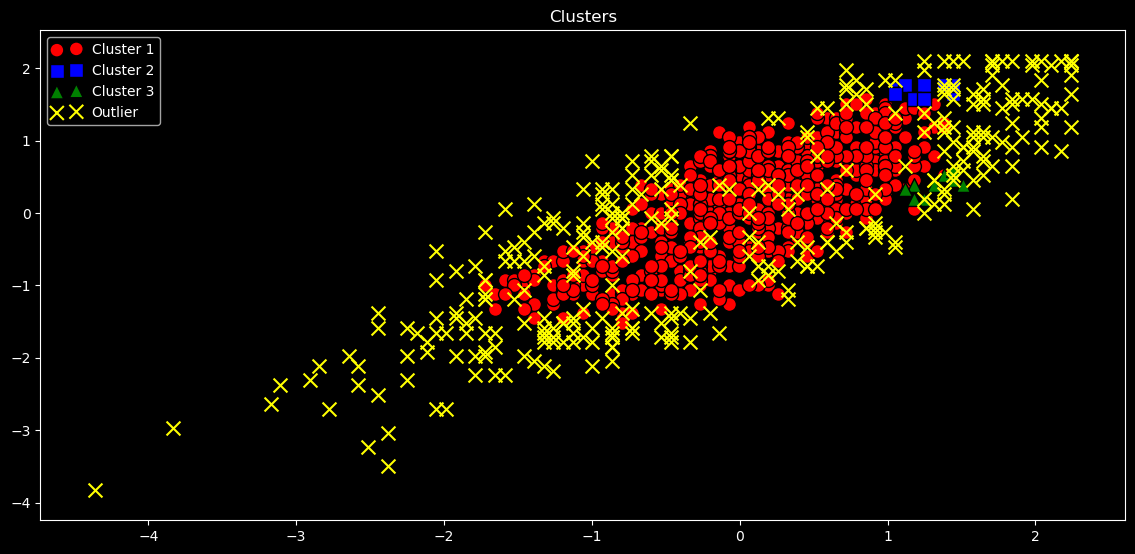

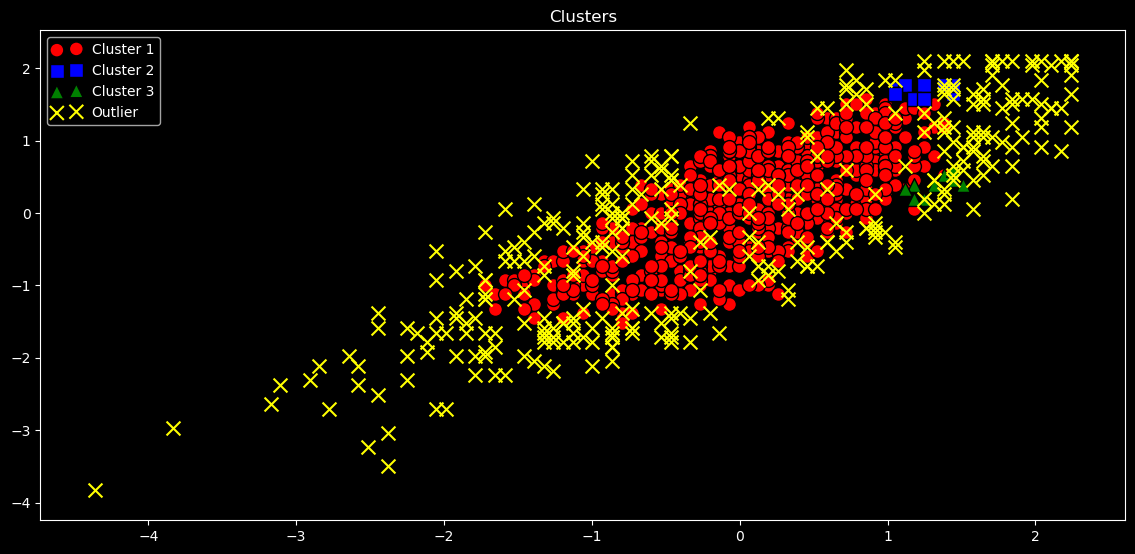

In [31]:
plt.subplot(2,1,1)
plt.scatter(x_sc[y_db==0, 0], x_sc[y_db==0, 2],marker="o", s=100,c='red', label ='Cluster 1',edgecolor='black')
plt.scatter(x_sc[y_db==1, 0], x_sc[y_db==1, 2],marker="s", s=100, c='blue', label ='Cluster 2',edgecolor='black')
plt.scatter(x_sc[y_db==2, 0], x_sc[y_db==2, 2],marker="^", s=100, c='green', label ='Cluster 3',edgecolor='black')
plt.scatter(x_sc[y_db==-1, 0], x_sc[y_db==-1, 2],marker="x", s=100, c='yellow', label ='Outlier', edgecolor='black')

fig = plt.gcf()
fig.set_size_inches(14,14)

plt.title('Clusters')
plt.legend(scatterpoints = 2)
plt.show()


plt.subplot(2,1,2)
plt.scatter(x_sc[y_db==0, 0], x_sc[y_db==0, 2],marker="o", s=100,c='red', label ='Cluster 1',edgecolor='black')
plt.scatter(x_sc[y_db==1, 0], x_sc[y_db==1, 2],marker="s", s=100, c='blue', label ='Cluster 2',edgecolor='black')
plt.scatter(x_sc[y_db==2, 0], x_sc[y_db==2, 2],marker="^", s=100, c='green', label ='Cluster 3',edgecolor='black')
plt.scatter(x_sc[y_db==-1, 0], x_sc[y_db==-1, 2],marker="x", s=100, c='yellow', label ='Outlier', edgecolor='black')

fig = plt.gcf()
fig.set_size_inches(14,14)

plt.title('Clusters')
plt.legend(scatterpoints = 2)
plt.show()

# Hence these are the clusters formed by the unsupervised model
